<a href="https://colab.research.google.com/github/ronaldos21/CS672Project1/blob/main/CS672_Project_1(own%20code).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [ ]:
!pip install tensorflow-data-validation

In [ ]:
!pip install apache-beam

In [ ]:
!pip install tensorflow

In [ ]:
!pip install graphviz

In [ ]:
import tensorflow as tf
import tensorflow_data_validation as tfdv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo

# fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
features = wine.data.features
target = wine.data.targets


features_df = pd.DataFrame(features)
target_df = pd.DataFrame(target)
df = pd.concat([features_df, target_df], axis=1)

In [ ]:
df.head()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [ ]:
df.columns

Index(['Alcohol', 'Malicacid', 'Ash', 'Alcalinity_of_ash', 'Magnesium',
       'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue',
       '0D280_0D315_of_diluted_wines', 'Proline', 'class'],
      dtype='object')

In [ ]:
df.rename(columns={'Alcalinity_of_ash': 'Alcalinity of Ash', 'Total_phenols': 'Total Phenols',
                   'Nonflavanoid_phenols': 'Nonflavanoid Phenols', 'Color_intensity': 'Color Intensity',
                   '0D280_0D315_of_diluted_wines': '0D280_0D315 of Diluted Wines','class': 'Class'}, inplace=True)

In [ ]:
df.columns

Index(['Alcohol', 'Malicacid', 'Ash', 'Alcalinity of Ash', 'Magnesium',
       'Total Phenols', 'Flavanoids', 'Nonflavanoid Phenols',
       'Proanthocyanins', 'Color Intensity', 'Hue',
       '0D280_0D315 of Diluted Wines', 'Proline', 'Class'],
      dtype='object')

In [ ]:
df.shape

(178, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malicacid                     178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity of Ash             178 non-null    float64
 4   Magnesium                     178 non-null    int64  
 5   Total Phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid Phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color Intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  0D280_0D315 of Diluted Wines  178 non-null    float64
 12  Proline                       178 non-null    int64  
 13  Class

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

Alcohol                         0
Malicacid                       0
Ash                             0
Alcalinity of Ash               0
Magnesium                       0
Total Phenols                   0
Flavanoids                      0
Nonflavanoid Phenols            0
Proanthocyanins                 0
Color Intensity                 0
Hue                             0
0D280_0D315 of Diluted Wines    0
Proline                         0
Class                           0
dtype: int64

In [ ]:
df.describe()

,Alcohol,Malicacid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanins,Color Intensity,Hue,0D280_0D315 of Diluted Wines,Proline,Class
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


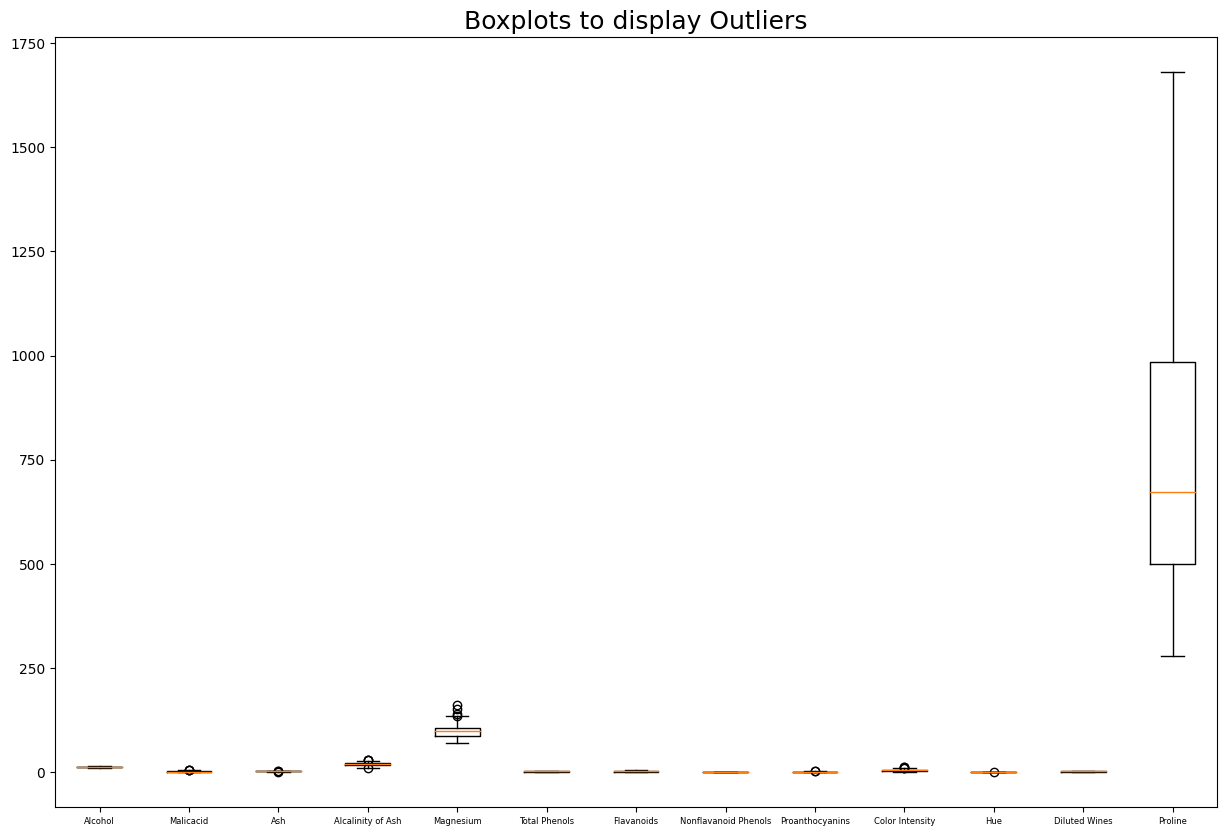

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.boxplot(df[['Alcohol', 'Malicacid', 'Ash', 'Alcalinity of Ash', 'Magnesium',
               'Total Phenols', 'Flavanoids', 'Nonflavanoid Phenols',
               'Proanthocyanins', 'Color Intensity', 'Hue',
               '0D280_0D315 of Diluted Wines', 'Proline']])
ax.set_xticklabels(['Alcohol', 'Malicacid', 'Ash', 'Alcalinity of Ash', 'Magnesium',
                   'Total Phenols', 'Flavanoids', 'Nonflavanoid Phenols',
                   'Proanthocyanins', 'Color Intensity', 'Hue',
                   'Diluted Wines', 'Proline'])
ax.tick_params(axis='x', labelsize=6)

plt.title('Boxplots to display Outliers', fontsize=18)

plt.show()

In [ ]:
def remove_outliers(df, cols):
    for col in cols:
        # Calculate quartiles and IQR for the column
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1

        # Identify outliers using the IQR method
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        outliers = ((df[col] < lower) | (df[col] > upper))

        # erplace outliers with NaN
        df[outliers] = pd.NA

    # Drop rows with NaN values
    df.dropna(inplace=True)

    return df

In [ ]:
df = remove_outliers(df, ['Alcohol', 'Malicacid', 'Ash', 'Alcalinity of Ash', 'Magnesium',
       'Total Phenols', 'Flavanoids', 'Nonflavanoid Phenols',
       'Proanthocyanins', 'Color Intensity', 'Hue',
       '0D280_0D315 of Diluted Wines', 'Proline'])
df.shape

(161, 14)

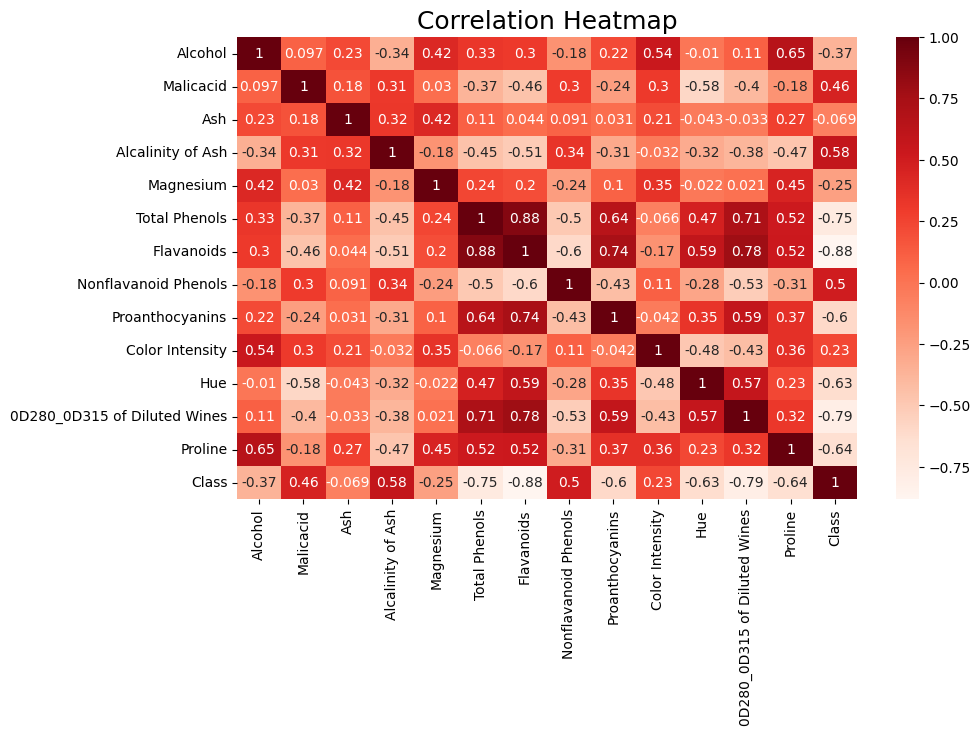

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, cmap='Reds', annot=True, annot_kws={'fontsize': 10})
plt.title('Correlation Heatmap', fontsize=18)
plt.show()

In [ ]:
x = df.drop('Class', axis = 1)
y = df.Class

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Instantiate the feature selector
selector = SelectKBest(score_func=f_classif, k=6)

# Fit the selector to the data and transform the features
x_new = selector.fit_transform(x, y)

# Get the mask of selected features
mask = selector.get_support()

# Get the names of the selected columns
selected_columns = x.columns[mask]

print(selected_columns)

Index(['Alcohol', 'Total Phenols', 'Flavanoids', 'Color Intensity',
       '0D280_0D315 of Diluted Wines', 'Proline'],
      dtype='object')


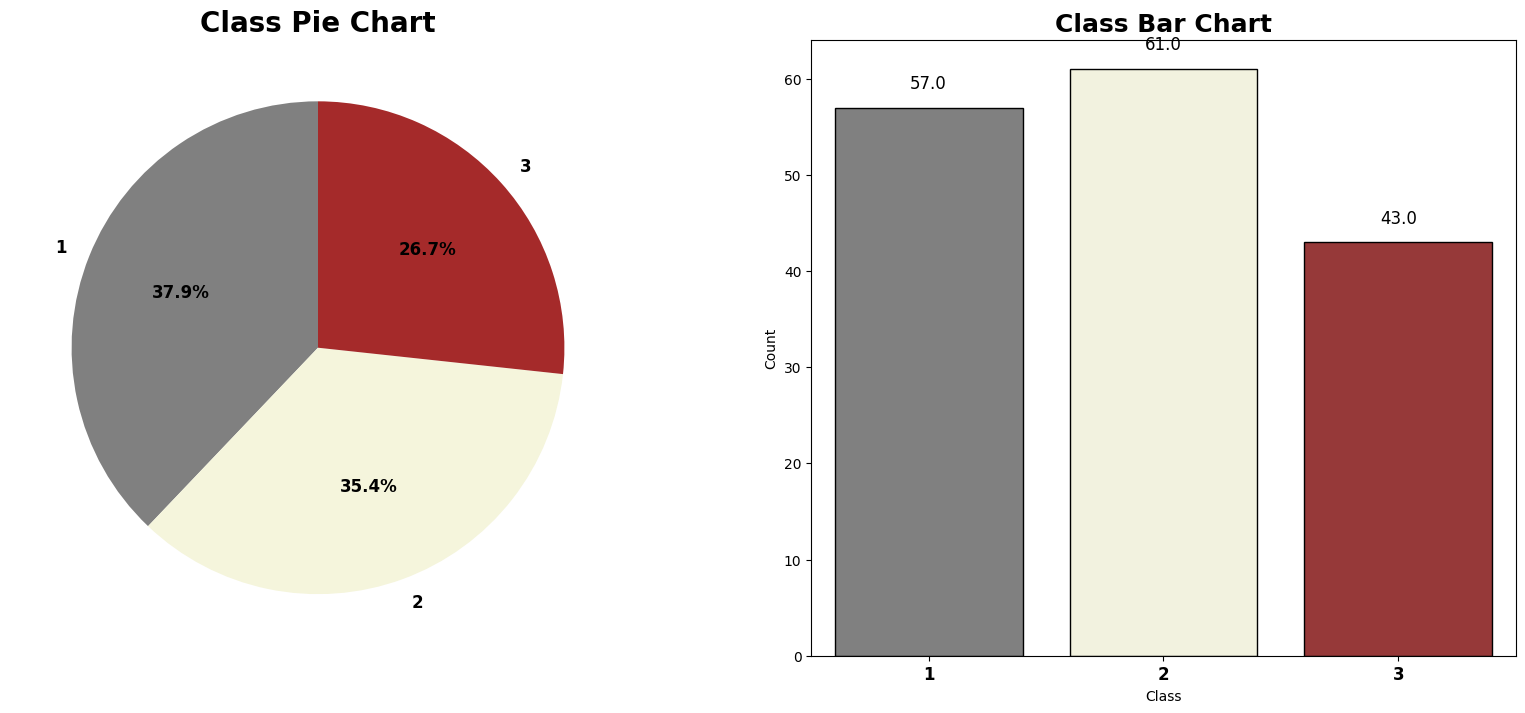

In [ ]:
counts = df['Class'].value_counts()

# create a pie chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Define data for the pie chart

labels = ['1', '2', '3']
colors = ['gray', 'beige', 'brown']

ax1.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, textprops={'fontweight': 'bold', 'fontsize': 12})
ax1.set_title('Class Pie Chart', fontdict={'fontweight': 'bold', 'fontsize': 20})

ax2 = sns.countplot(x='Class', data = df ,palette = colors ,edgecolor = 'black')
ax2.set(xlabel='Class', ylabel='Count')
ax2.set_title('Class Bar Chart', fontdict={'fontweight': 'bold', 'fontsize': 18})
for rect in ax2.patches:
    ax2.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 12)
    ax2.set_xticklabels(['1','2','3'], fontdict={'fontweight': 'bold', 'fontsize': 12})


plt.show()

In [ ]:
train_stats = tfdv.generate_statistics_from_dataframe(x_train)

tfdv.visualize_statistics(train_stats)

In [ ]:
type(x)